In [1]:
import pandas 
import seaborn
import matplotlib.pyplot as plt 
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipotle_data = pandas.read_csv(url, sep = '\t')
chipotle_data.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [2]:
chipotle_data.groupby('item_name').agg({
    'quantity': 'sum'
}).sort_values('quantity', ascending =False)[:1]

,quantity
item_name,
Chicken Bowl,761


In [11]:
chipotle_data['item_price'] = chipotle_data['item_price'].replace('[\$]', '', regex=True).astype(float)
revenue = (chipotle_data['quantity'] * chipotle_data['item_price']).sum()

print(f"Total Revenue: ${revenue:.2f}")

Total Revenue: $39237.02


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/n_/cz2fpj9523z28rjn177_1g500000gn/T/ipykernel_4854/4152771712.py:1: SyntaxWarning: invalid escape sequence '\$'
  chipotle_data['item_price'] = chipotle_data['item_price'].replace('[\$]', '', regex=True).astype(float)


In [14]:
total_order = (chipotle_data['quantity']).sum()
           
print(f"Total order: {total_order:.2f}")

Total order: 4972.00


In [16]:
item_over_10 = chipotle_data[chipotle_data['item_price']> 10] 

print(len(set(item_over_10['item_name'])))

31


In [19]:
unique= chipotle_data['item_name'].unique()

print(unique)

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Chips and Tomatillo Green Chili Salsa' 'Barbacoa Bowl'
 'Chips' 'Chicken Salad Bowl' 'Steak Bowl' 'Barbacoa Soft Tacos'
 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted Chili-Corn Salsa'
 'Chips and Roasted Chili Corn Salsa' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl'
 '6 Pack Soft Drink' 'Chips and Tomatillo-Red Chili Salsa' 'Bowl'
 'Burrito' 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Chips and Mild Fresh Tomato Salsa' 'Veggie Soft Tacos'
 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl' 'Salad' 'Veggie Cris

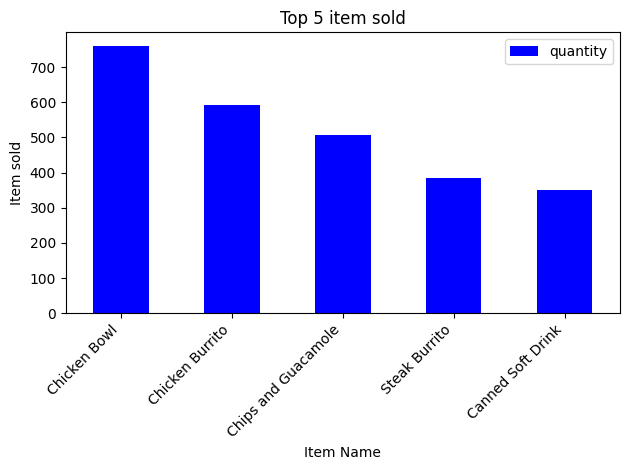

In [29]:
top_5 = chipotle_data.groupby('item_name').agg({
    'quantity': 'sum'
}).sort_values('quantity', ascending =False)[:5]

top_5.plot(kind= 'bar', color = 'blue')

plt.title("Top 5 item sold")
plt.xlabel('Item Name')
plt.ylabel("Item sold")
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

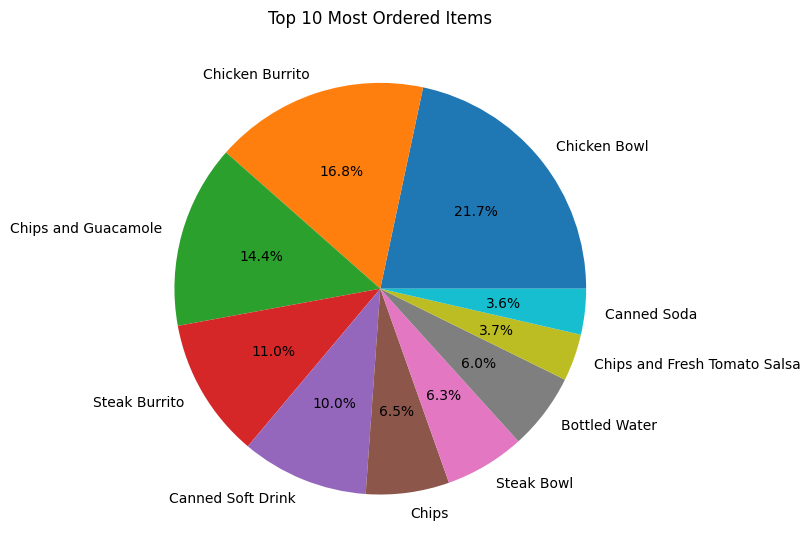

In [35]:
top_10 = chipotle_data.groupby('item_name')['quantity'].sum().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%')
plt.title("Top 10 Most Ordered Items")
plt.tight_layout()
plt.show()

In [ ]:
first_10_orders = quantity_per_order.head(20)

plt.plot(first_10_orders.index, first_10_orders.values, marker='d', linestyle='-', color='green')
plt.grid(True)
plt.title('Quantity Ordered in First 20 Orders')
plt.xlabel('Order ID')
plt.ylabel('Total Quantity')
plt.xticks(first_20_orders.index, rotation=45)
plt.tight_layout()
plt.show()